# FORESEE - Up-Philic Scalar

### Load Libraries 

In [15]:
import sys
src_path = "/Users/jordi/software/FORESEE"
sys.path.append(src_path)

import numpy as np
from src.foresee import Foresee, Utility, Model

from matplotlib import pyplot as plt

## 1. Initialization 


All function that we will need are included in the FORESEE package. We start by simply initializing it: 

In [16]:
foresee = Foresee()

In [17]:
energy = "13.6"
modelname = "UpPhilic"
model = Model(modelname)

In [18]:
model.add_production_2bodydecay(
    pid0 = "221",
    pid1 = "111",
    br = "1.26e5 * coupling**2 * np.sqrt((1-(mass+0.135)**2/0.547**2)*(1-(mass-0.135)**2/0.547**2))",
    generator = "EPOSLHC",
    energy = energy,
    nsample = 10,
)

model.add_production_2bodydecay(
    pid0 = "331",
    pid1 = "111",
    br = "273. * coupling**2 * np.sqrt((1-(mass+0.135)**2/0.957**2)*(1-(mass-0.135)**2/0.957**2))",
    generator = "EPOSLHC",
    energy = energy,
    nsample = 10,
)

model.add_production_2bodydecay(
    pid0 = "321",
    pid1 = "211",
    br = "7.42 * coupling**2 * np.sqrt((1-(mass+0.135)**2/0.49368**2)*(1-(mass-0.135)**2/0.49368**2))",
    generator = "EPOSLHC",
    energy = energy,
    nsample = 10,
)

model.add_production_2bodydecay(
    pid0 = "-321",
    pid1 = "-211",
    br = "7.42 * coupling**2 * np.sqrt((1-(mass+0.135)**2/0.49368**2)*(1-(mass-0.135)**2/0.49368**2))",
    generator = "EPOSLHC",
    energy = energy,
    nsample = 10,
)

In [19]:
model.set_ctau_1d(
    filename="model/ctau.txt", 
    coupling_ref=1
)

**Branching Fractions:** 

In [20]:
branchings = [
    ["gamma"     , "black"        , "solid" , r"$\gamma\gamma$"         , 0.110, 0.50],
    ["pi0_pi0"   , "red"          , "solid" , r"$\pi^0\pi^0$"          , 0.175, 0.03],
    ["pi+_pi-"   , "blue"         , "solid" , r"$\pi^+\pi^-$"           , 0.300, 0.03],
]

model.set_br_1d(
    modes=[channel for channel,_,_,_,_,_ in branchings],
    finalstates=[[22,22], [111,111],[211,-211],],
    filenames=["model/br/"+channel+".txt" for channel,_,_,_,_,_ in branchings],
)

## 3. Generate LLP Spectra

After we have specified the model, let us generate the LLP spectra. We first set the model we just created. 

In [21]:
foresee.set_model(model=model)

## 6. Plot the Results

Now let's plot the results. We first specify all detector setups for which we want to show result (filename in model/results directory, label, color, linestyle, opacity alpha for filled contours, required number of events).

In [22]:
setups = [ 
    ["13.6TeV_FASER.npy",      "FASER"    , "firebrick",   "solid", 0., 3],
    ["UpPhilic_yields.npy",    "jordi"  , "red",         "solid", 0., 3],
    ["UpPhilic_cutyields.npy",    "jordi cuts"  , "red",         "dashed", 0., 3],
]


Then we specify all the existing bounds (filename in model/bounds directory, label, label position x, label position y, label rotation)

In [23]:
bounds = [ 
    ["bounds_BBN.txt"       , "BBN"    , 0.200, 5.0*10**-10, 0  ],
    ["bounds_MAMI.txt"      , "MAMI"   , 0.210, 2.5*10**-3 , 0  ],
    ["bounds_CHARM.txt"     , "CHARM"  , 0.200, 1.5*10**-5 , 0  ],
    ["bounds_CHARM2.txt"    , None     , 0.   , 0.         , 0  ],
    ["bounds_E137.txt"      , "E137"   , 0.215, 2.1*10**-4 , 0 ],
    ["bounds_SN1987.txt"    , "SN1987" , 0.2  , 1.0*10**-8 , 0  ],
    ["bounds_KLOE.txt"      , "KLOE"   , 0.358, 3.4*10**-4 , 90 ],
    ["bounds_BES3.txt"      , "BES3"   , 0.500, 3.0*10**-3 , 0  ],
]

We then specify other projected sensitivitities (filename in model/bounds directory, color, label, label position x, label position y, label rotation)

In [24]:
projections = [
    ["limits_SHiP.txt",       "teal",         "SHiP"    , 0.600, 1.0*10**-9, 0  ],
    ["limits_REDTOP.txt",     "dodgerblue",   "REDTOP"  , 0.410, 5.0*10**-6, 0  ],
]
#projections = []

Finally, we can plot everything using `foresee.plot_reach()`. It returns a matplotlib instance, to which we can add further lines and which we can show or save. Below, we add the dark matter relict target line for a specific benchmark.

AttributeError: 'tuple' object has no attribute 'subplots_adjust'

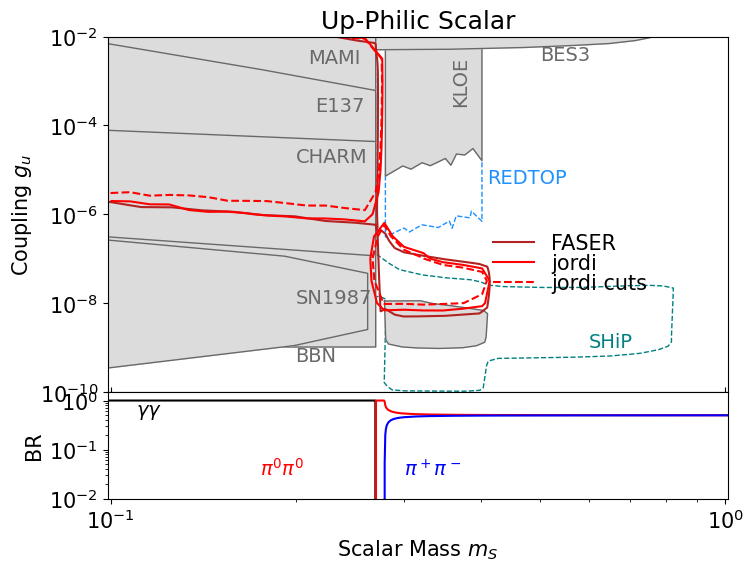

In [25]:
plot = foresee.plot_reach(
    setups=setups,
    bounds=bounds,
    projections=projections,
    title="Up-Philic Scalar", 
    xlims=[0.099,1.01], 
    ylims=[10**-10,10**-2],
    xlabel=r"Scalar Mass $m_S$", 
    ylabel=r"Coupling $g_u$",
    legendloc=(0.90,0.50),
    figsize=(8,6),
    branchings=branchings
)
plot.subplots_adjust(left=0.12, right=0.97, bottom=0.10, top=0.95)
#plot.savefig("/Users/felixkling/Downloads/Figure.pdf")
plot.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[[-1.73984246e+00 -1.71761407e+00 -1.69131630e+00 -1.74124444e+00
  -1.73243608e+00 -1.68171512e+00 -1.63096394e+00 -1.58965397e+00
  -1.37416021e+00 -1.67671187e+00 -1.63514765e+00 -1.67281893e+00
  -1.58651160e+00 -1.64624498e+00 -1.31500615e+00 -1.62769960e+00
  -1.59743150e+00 -1.50035546e+00 -2.00341786e+00 -1.99337241e+00
  -2.21941461e+00 -2.27780620e+00 -2.28096565e+00]
 [-1.76671704e+00 -1.68235094e+00 -1.70113309e+00 -1.73109991e+00
  -1.74721352e+00 -1.65112865e+00 -1.66161407e+00 -1.60828171e+00
  -1.38058213e+00 -1.65189210e+00 -1.63201006e+00 -1.69059806e+00
  -1.60743887e+00 -1.64439931e+00 -1.34245530e+00 -1.63332040e+00
  -1.59822796e+00 -1.53797594e+00 -2.02352689e+00 -2.00168437e+00
  -2.23173723e+00 -2.28094116e+00 -2.27197984e+00]
 [-1.76516670e+00 -1.69980271e+00 -1.67663158e+00 -1.71792155e+00
  -1.74244670e+00 -1.65448587e+00 -1.68202469e+00 -1.62245207e+00
  -1.69985079e+00 -1.62222238e+00 -1.61530490e+00 -1.69033745e+00
  -1.67116930e+00 -1.66761016e+00 -1.328

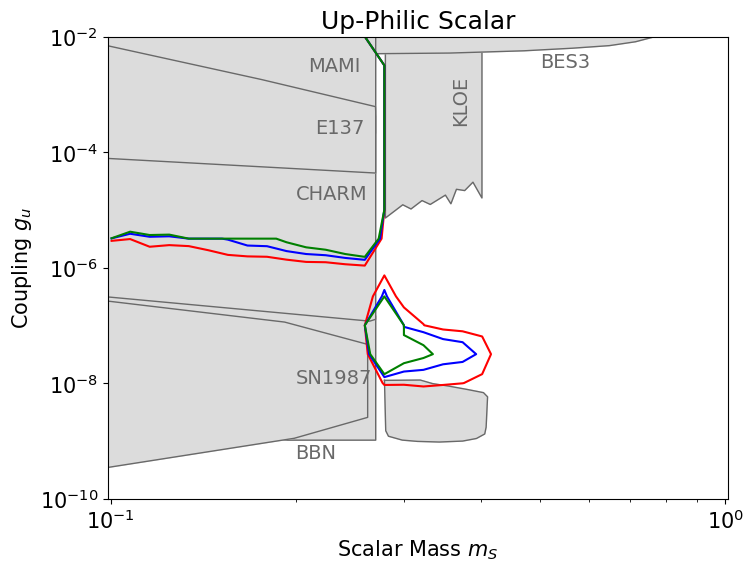

In [32]:
# calculating contour using significance values
z_level = 1.645
bkg_events = 24
bkg_frac_unc = 0.3
setups_jordi = [
    #["14TeV_default.npy",    "Jordi"  , "red",     "solid", 0., 100],
    #["14TeV_default_nominal.npy",    "Nominal"  , "blue",     "solid", 0., 3, bkg_events, bkg_frac_unc, z_level ]
    ["UpPhilic_cutyields.npy",    "Nominal"  , "red",     "solid", 0., 3, 0., 0.001, z_level ],
    ["UpPhilic_cutyields.npy",    "Nominal"  , "blue",     "solid", 0., 3, bkg_events, bkg_frac_unc, z_level ],
    ["UpPhilic_cutyields.npy",    "Nominal"  , "green",     "solid", 0., 3, bkg_events, 0.99, z_level ]

]
my_plot = foresee.plot_reach_FASER(
    setups=setups_jordi,
    bounds=bounds,
    projections=[],
    title="Up-Philic Scalar", 
    xlims=[0.099,1.01], 
    ylims=[10**-10,10**-2],
    xlabel=r"Scalar Mass $m_S$", 
    ylabel=r"Coupling $g_u$",
    legendloc=(0.90,0.50),
    figsize=(8,6),
    #branchings=branchings
)

#plot.subplots_adjust(left=0.12, right=0.97, bottom=0.10, top=0.95)
#plot.savefig("/Users/jordi/Downloads/UpPhilic.pdf")
my_plot.show()

(17,)
(23,)


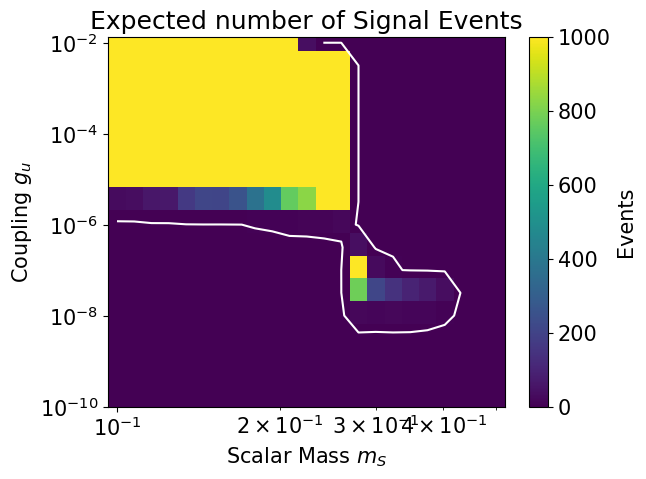

In [28]:
from matplotlib.ticker import LogFormatterSciNotation
# Convert the list_nevents to an array for indexing
#list_nevents = np.array(list_nevents)
#masses = np.logspace(-1,-0.3,23)
#couplings = np.logspace(-10,-2,17)
masses,couplings,nsignals=np.load("model/results/UpPhilic_yields.npy", allow_pickle=True, encoding='latin1')
print(np.shape(couplings))
print(np.shape(masses))

n = np.array(nsignals).T+1e-20
m, c = np.meshgrid(masses, couplings)

# Set the desired colorbar range
zmin = 0
zmax = 1e3
plt.pcolormesh(m, c, n, vmin=zmin, vmax=zmax)
#plt.colorbar()
# Add a colorbar for reference with logarithmic scale and scientific notation
#cbar = plt.colorbar(format=LogFormatterSciNotation(), label='Value')
cbar = plt.colorbar()
cbar.set_label('Events')
# Set the x-axis and y-axis to log scale
plt.xscale('log')
plt.yscale('log')


# Add contour lines where the value is greater than 3
contour_levels = [3.000001]  # Adjust the contour level as needed
plt.contour(m, c, n, levels=contour_levels, colors='white')

# Add labels and a title

plt.xlabel(r'Scalar Mass $m_S$')
plt.ylabel(r'Coupling $g_u$')
plt.title('Expected number of Signal Events')

plt.show()